### 데이터 불러오기

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np

In [2]:
# 타이타닉 dataset은  test데이터와 train데이터로 나뉘어 있습니다,
# train데이터는 모델 훈련에 쓰이고, test데이터는 모델 검증에 쓰입니다.
# test데이터에는 train데이터와 다르게 Survived 행이 존재하지 않습니다.
# test데이터 셋의 Survived행을 예측하기 위함이기 때문입니다.
train= pd.read_csv('C:/Python_study/Python/Project1/titanic/train.csv')
test= pd.read_csv('C:/Python_study/Python/Project1/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()
'''
Survived : 0 = 사망, 1 = 생존
Pclass : 1 = 1등석,2 = 2등석,3 = 3등석
Sex : male = 남성, female = 여성
Age : 나이
SibSp : 타이타닉 호에 동승한 자매/ 배우자의 수
Parch : 타이타닉 호에 동승한 부모/ 자식의 수
Ticket : 티켓 번호
Fare : 승객 요금
Cabin : 방 호수
Embarked : 탑승지 , C= 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
'''

# 아래와 같이 생긴 dataset은 어떤 모델에 적용시켜도 수많은 에러와
# 낮은 정확도를 나타낼것이므로 앞으로 전처리를 하겠습니다.

# 1. Name,Sex,Embarked 자료형은 컴퓨터가 학습하기에 나쁘기 때문에
# 숫자로 바꾸도록 하겠습니다.

# 2. Age행에 Nan, 즉 결측치 값을 채워야합니다.
# Nan값을 훈련할 때 사용한다면 잘못된 가중치로 받아 들일 수 있기 때문입니다.

# 3. Cabin과 같이 Nan값이 너무 많은 컬럼은 삭제합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'\nSurvived : 0 = 사망, 1 = 생존\nPclass : 1 = 1등석,2 = 2등석,3 = 3등석\nSex : male = 남성, female = 여성\nAge : 나이\nSibSp : 타이타닉 호에 동승한 자매/ 배우자의 수\nParch : 타이타닉 호에 동승한 부모/ 자식의 수\nTicket : 티켓 번호\nFare : 승객 요금\nCabin : 방 호수\nEmbarked : 탑승지 , C= 셰르부르, Q = 퀸즈타운, S = 사우샘프턴\n'

### 데이터 전처리

In [4]:
# test와 train data set을 한번에 전처리 하기 위해
# pandas에서 제공하는 concat으로 잠시 묶어둡니다.
uni = pd.concat([train.drop("Survived",axis=1),test],axis=0)
whole = [train,test,uni]


In [5]:
# Sex의 문자열을 숫자로 변환합니다. 
# Dictionary를 이용해 male은 0으로 female은 1로 변환합니다.
dic = {"male":0,"female":1}
for dataset in whole:
    dataset["Sex"] = dataset["Sex"].map(dic)
train.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  .

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 정규표현식을 사용해서 이름앞에 있는 호칭을 추출합니다.
for dataset in whole:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
train['Title'].value_counts().sort_index()

Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: Title, dtype: int64

In [8]:
# 기존에 Name컬럼을 삭제하고 Title컬럼을 (0,1,2,3,4)로 매핑하겠습니다
#  One-hot-encoding !
dic = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }

for dataset in whole:
    dataset.drop("Name", axis=1,inplace=True)
    dataset["Title"] = dataset["Title"].map(dic)
    dataset.set_index("PassengerId",inplace=True)
whole[0]


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,4
888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


In [9]:
for dataset in whole:
    dataset["Age"].fillna(uni.groupby("Title")["Age"].transform("mean"),inplace=True)
train.info()
## age가 float형이므로 네구간으로 나누고 int형으로 변환하여 메모리 절약

# Nan값을 채우는 여러 방법이 있는데
# 1. Nan값에 평균을 대입한다.
# 2. Nan값이 존재하는 행을 배제
# 3. Nan값을 해당 열의 윗 열 데이터, 혹은 아랫열 데이터를 가져온다.(ffill,bfill)
# Title의 평균을 해당 Title을 가진 Nan값에 대입합니다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


In [10]:
'''

Pandas에서 제공하는 qcut함수를 통해 
1. 0~22 세
2. 23~29 세
3. 30~35 세
4. 35세 초과
정해진 비율대로 Age값을 카테고리화 합니다.

Agecut이 생기고 모델 훈련에 사용하지 않을 Age를 삭제합니다.
'''

for dataset in whole:
    dataset["Agecut"]=pd.qcut(dataset["Age"],4,labels=[0,1,2,3])
    dataset.drop("Age",axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Agecut
PassengerId,,,,,,,,,,,
1,0,3,0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,1,1,0,PC 17599,71.2833,C85,C,2,3
3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
4,1,1,1,1,0,113803,53.1000,C123,S,2,2
5,0,3,0,0,0,373450,8.0500,NaN,S,0,2


In [11]:
# Fare에 결측치 값을 가장 관련있는 Pclass와 관련지어 평균을 대입합니다.
for dataset in whole:
    dataset["Fare"].fillna(uni.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    1309 non-null   int64   
 1   Sex       1309 non-null   int64   
 2   SibSp     1309 non-null   int64   
 3   Parch     1309 non-null   int64   
 4   Ticket    1309 non-null   object  
 5   Fare      1309 non-null   float64 
 6   Cabin     295 non-null    object  
 7   Embarked  1307 non-null   object  
 8   Title     1309 non-null   int64   
 9   Agecut    1309 non-null   category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 136.0+ KB


In [12]:
# Age를 카테고리화 할때와 같은 방식으로 Fare도 카테고리화를 진행합니다.
for dataset in whole:
    dataset["Farecut"] = pd.cut(dataset["Fare"],4,labels=[0,1,2,3])
    dataset.drop("Fare",axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,Agecut,Farecut
PassengerId,,,,,,,,,,,
1,0,3,0,1,0,A/5 21171,NaN,S,0,1,0
2,1,1,1,1,0,PC 17599,C85,C,2,3,0
3,1,3,1,0,0,STON/O2. 3101282,NaN,S,1,1,0
4,1,1,1,1,0,113803,C123,S,2,2,0
5,0,3,0,0,0,373450,NaN,S,0,2,0


In [13]:
# 테이블 drop
for dataset in whole:
    dataset.drop(labels="Cabin",axis=1,inplace=True)
    dataset.drop(labels="Ticket",axis=1,inplace=True)
    

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Embarked  889 non-null    object  
 6   Title     891 non-null    int64   
 7   Agecut    891 non-null    category
 8   Farecut   891 non-null    category
dtypes: category(2), int64(6), object(1)
memory usage: 57.8+ KB


In [14]:
# Embared 행의 Nan drop
train.dropna(axis=0,inplace=True)

In [15]:
# S는 0, C는 1, Q는 2로 매핑시켜 자료형 변환해줍니다.
dic2 = {"S": 0, "C": 1, "Q": 2}
train.loc[:,"Embarked"] = train.loc[:,"Embarked"].map(dic2)
test.loc[:,"Embarked"] = test.loc[:,"Embarked"].map(dic2)

C:\Users\kkt09\AppData\Local\Temp\ipykernel_44160\437966288.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,"Embarked"] = train.loc[:,"Embarked"].map(dic2)
C:\Users\kkt09\AppData\Local\Temp\ipykernel_44160\437966288.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,"Embarked"] = test.loc[:,"Embarked"].map(dic2)


In [16]:
# 동반자가 있는지 없는지 판단하기 위해 
# SibSp, Parch를 합해줍니다.
for dataset in whole:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1


In [17]:
# isAlone이 0 이면 동반자가 있고, 1이면 동반자가 없습니다.
for dataset in whole:
    dataset["IsAlone"] = 0 # 동반자가 있음
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1 # 동반자가 없음

In [18]:
# 테이블 drop
for dataset in whole:
    dataset.drop(labels="SibSp",axis=1,inplace=True)
    dataset.drop(labels="Parch",axis=1,inplace=True)
    dataset.drop(labels="FamilySize",axis=1,inplace=True)
    dataset.drop(labels="Title",axis=1,inplace=True)

In [19]:
# 지도학습이기때문에 라벨을 분리시킬 필요가 있습니다.
# 생존 유무를 파악하기 위함이므로 label에 Survived행을 저장합니다.
label = train["Survived"]
train.drop("Survived", axis=1, inplace=True)
train.head()

,Pclass,Sex,Embarked,Agecut,Farecut,IsAlone
PassengerId,,,,,,
1,3,0,0,1,0,0
2,1,1,1,3,0,0
3,3,1,0,1,0,1
4,1,1,0,2,0,0
5,3,0,0,2,0,1


## 모델링

## 사용할 모델 불러오기

In [20]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
# k_fold = KFold(n_splits=20, shuffle=True, random_state=1)

## SVM(서포트 벡터 머신)

In [22]:
# 파라미터들을 dictionary형태로 설정
param1={"C":[0.001,0.01,0.1,1,10,100],
      "gamma":[0.001,0.01,0.1,1,10,100]}

In [23]:
# Grid search는 모델에 하이퍼 파라미터에 넣을 수 있는 값들을
# 순차적으로 입력한뒤 가장 높은 성능을 보이는 파라미터를 찾아준다.
clf = SVC()
grid_search = GridSearchCV(clf,param_grid=param1,cv=20,
                           refit=True,
                           return_train_score=True)

grid_search.fit(train,label)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [24]:
# 최고 정확도를 나타냅니다
grid_search.best_score_

0.8098484848484848

In [25]:
# 최고 파라미터를 나타냅니다.
grid_search.best_params_

{'C': 1, 'gamma': 1}

In [26]:
#refit=True로 지정했기 때문에 최고의 파라미터로 미리 훈련했고 
# 그 최적의 모델을 반환합니다.
best_model = grid_search.best_estimator_
best_model

SVC(C=1, gamma=1)

In [27]:
# 최적의 모델의 score
best_model.score(train,label)

0.8368953880764904

In [28]:
# 최적의 C와 gamma를 설정하고 훈련데이터를 사용해 SVM모델 생성 후
# test데이터로 예측값을 뽑습니다.
clf = SVC(C=1,gamma=0.1,probability=True)
clf.fit(train,label)
prediction = clf.predict(test)
pred = pd.DataFrame({"PassengerId" : test.index, 
                    "Survived" : prediction})
pred.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [29]:
# 제출을 위한 gender_submission에 적용
pred.to_csv("./gender_submission", index=False)

## 랜덤포레스트

In [30]:
# 파라미터들을 dictionary형태로 설정
param2 = {'max_depth': range(5,20,1), # 15
          'min_samples_split': range(2,100,10), # 10
          'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001)  # 9
         }

In [31]:
# RandomizedSearchCV는 모든 파라미터를 사용하지 않고 
# 랜덤하게 추출된 샘플링을 사용해서 최고의 파라미터를 찾아준다.
rf=RandomForestClassifier()
rs = RandomizedSearchCV(rf, 
                        param_distributions=param2, 
                        scoring="accuracy",
                        n_jobs=-1, 
                        refit=True, 
                        cv=5,
                        verbose=1,
                        n_iter=500)

In [32]:
rs.fit(train, label)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(5, 20),
                                        'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                                        'min_samples_split': range(2, 100, 10)},
                   scoring='accuracy', verbose=1)

In [33]:
# 최고 정확도를 나타냅니다
rs.best_score_

0.8087856281343235

In [34]:
# 최고 파라미터를  나타냅니다
rs.best_params_

{'min_samples_split': 12,
 'min_impurity_decrease': 0.00030000000000000003,
 'max_depth': 13}

In [35]:
#refit=True로 지정했기 때문에 최고의 파라미터로 미리 훈련했고 
# 그 최적의 모델을 반환합니다.
best_model = rs.best_estimator_
best_model

RandomForestClassifier(max_depth=13,
                       min_impurity_decrease=0.00030000000000000003,
                       min_samples_split=12)

In [36]:
# 최적의 모델의 score
best_model.score(train, label)

0.8335208098987626

In [37]:
# 최적의 파라미터를 설정하고 훈련데이터를 사용하여 랜덤포레스트 모델 생성 후
# test 데이터로 예측값을 뽑아냅니다
rf = RandomForestClassifier(max_depth=5,
                       min_impurity_decrease=0.00030000000000000003,
                       random_state=1)
rf.fit(train, label)
prediction = rf.predict(test)
pred = pd.DataFrame({"PassengerId" : test.index, 
                    "Survived" : prediction})
pred.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [38]:
# 제출을 위한 gender_submission에 적용
pred.to_csv("./gender_submission", index=False)

## 결정트리

In [39]:
# 파라미터들을 dictionary형태로 설정
param3 = {'max_depth': range(3,20,1), # 트리의 최대 깊이
          'min_samples_split': range(2,50,1), # 노드를 분할하기 위한 최소한의 샘플 데이터수
          'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001)  # 최소 불순도(지정된 값 이상이면 분할)
         }

In [40]:
# Grid search는 모델에 하이퍼 파라미터에 넣을 수 있는 값들을
# 순차적으로 입력한뒤 가장 높은 성능을 보이는 파라미터를 찾아준다.
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid=param3, scoring="accuracy", n_jobs=-1, refit=True, cv=5, verbose=1)

In [41]:
gs.fit(train, label)

Fitting 5 folds for each of 7344 candidates, totalling 36720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 50)},
             scoring='accuracy', verbose=1)

In [42]:
# 최고 정확도를 나타냅니다
gs.best_score_

0.8065574811147082

In [43]:
# 최고 파라미터를 나타냅니다
gs.best_params_

{'max_depth': 7,
 'min_impurity_decrease': 0.00030000000000000003,
 'min_samples_split': 12}

In [44]:
#refit=True로 지정했기 때문에 최고의 파라미터로 미리 훈련했고 
# 그 최적의 모델을 반환합니다.
best_model = gs.best_estimator_
best_model

DecisionTreeClassifier(max_depth=7,
                       min_impurity_decrease=0.00030000000000000003,
                       min_samples_split=12)

In [45]:
# 최적의 모델의 score
best_model.score(train, label)

0.8323959505061868

In [46]:
# 최적의 파라미터로 설정하고 훈련데이터를 사용해 결정트리 모델 생성 후
# test데이터로 예측값을 뽑습니다.
dt = DecisionTreeClassifier(max_depth=7,
                       min_impurity_decrease=0.00030000000000000003,
                       min_samples_split=12, random_state=1)
dt.fit(train,label)
prediction = clf.predict(test)
pred = pd.DataFrame({"PassengerId" : test.index, 
                    "Survived" : prediction})
pred.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [47]:
# 제출을 위한 gender_submission에 적용
pred.to_csv("./gender_submission", index=False)

## 시각화

In [48]:
# 결정트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

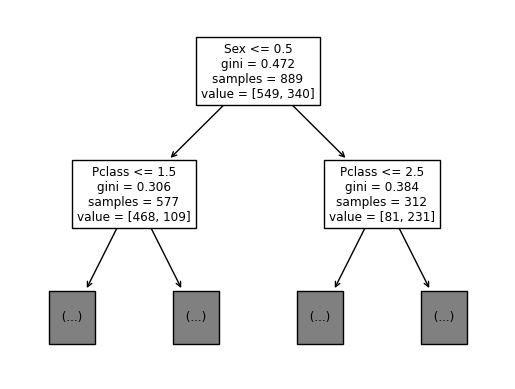

In [49]:
plot_tree(dt, feature_names=['Pclass','Sex','Embarked','Agecut','Farecut','IsAlone'], max_depth=1)
plt.show()